In [1]:
import pandas as pd


In [31]:
ETH=pd.read_excel("../../Ethereum/2022Ethereum_Original.xlsx")
ETH['Date'] = pd.to_datetime(ETH['Date'])
ETH.set_index('Date', inplace=True)

In [32]:
# List of columns to convert
columns_to_convert = ['Gold_Price', 'Oil_Price', 'Nasdaq_Close', 'S&P500_Close', 'BTC_Close','BTC_Volume','BTC_Market_Cap','Tweets_Count','Tweets_Vader_Sentiment','News_Vader_Sentiment']

# Applying the transformation
for column in columns_to_convert:
    ETH[column + '_binary'] = (ETH[column] > ETH[column].shift(1)).astype(int)

In [33]:
ETH.drop(["Internet_Penetration_USA","Population_USA","GDP_USA","Inflation_USA","Nasdaq_Open","Nasdaq_High","Nasdaq_Low","Nasdaq_Adj Close","Nasdaq_Volume","S&P500_Open","S&P500_High","S&P500_Low","S&P500_Adj Close","BTC_Open","BTC_High","BTC_Low",'Gold_Price', 'Oil_Price', 'Nasdaq_Close', 'S&P500_Close', 'BTC_Close','S&P500_Volume',],inplace=True,axis=1)
#'BTC_Volume','BTC_Market_Cap','Tweets_Count','Tweets_Vader_Sentiment','News_Vader_Sentiment'

In [34]:
columns_to_lag = ['Ethereum_Change'] #'Gold_Price_binary','Oil_Price_binary','Tweets_Count_binary','Tweets_Vader_Sentiment_binary','News_Vader_Sentiment_binary'

# Number of lags (days back) to create
number_of_lags = 5

# Create lag features for the selected columns
for column in columns_to_lag:
    for lag in range(1, number_of_lags + 1):
        ETH[f'{column}_lag_{lag}'] = ETH[column].shift(lag)

# Optionally, remove any rows with NaN values that were created due to shifting
ETH.dropna(inplace=True)

In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Selecting the columns to standardize
features = ETH[['BTC_Volume', 'BTC_Market_Cap', 'Tweets_Count', 'Tweets_Vader_Sentiment', 'News_Vader_Sentiment']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the features
features_scaled = scaler.fit_transform(features)

# Replace the original columns with the scaled columns
ETH[['BTC_Volume', 'BTC_Market_Cap', 'Tweets_Count', 'Tweets_Vader_Sentiment', 'News_Vader_Sentiment']] = features_scaled

In [36]:
ETH

,BTC_Volume,BTC_Market_Cap,Tweets_Count,Tweets_Vader_Sentiment,News_Vader_Sentiment,Ethereum_Change,Gold_Price_binary,Oil_Price_binary,Nasdaq_Close_binary,S&P500_Close_binary,...,BTC_Volume_binary,BTC_Market_Cap_binary,Tweets_Count_binary,Tweets_Vader_Sentiment_binary,News_Vader_Sentiment_binary,Ethereum_Change_lag_1,Ethereum_Change_lag_2,Ethereum_Change_lag_3,Ethereum_Change_lag_4,Ethereum_Change_lag_5
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-06,-0.827014,-0.873368,-0.793090,1.293722,-0.169681,1,1,0,0,0,...,1,1,0,1,0,0.0,0.0,1.0,0.0,1.0
2016-01-07,-0.826862,-0.873097,-0.798254,1.174629,0.841095,0,1,0,0,0,...,1,1,0,0,1,1.0,0.0,0.0,1.0,0.0
2016-01-08,-0.827637,-0.873298,-0.844844,1.429583,-0.571358,1,0,0,0,0,...,0,0,0,1,0,0.0,1.0,0.0,0.0,1.0
2016-01-09,-0.827876,-0.873541,-0.968677,2.227892,-0.571358,1,0,0,0,0,...,0,0,0,1,0,1.0,0.0,1.0,0.0,0.0
2016-01-10,-0.827722,-0.873381,-0.873165,1.853464,-0.571358,1,0,0,0,0,...,1,1,1,0,0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,-0.389634,0.128549,0.530476,-1.110987,-0.599557,0,0,0,0,0,...,1,0,1,1,0,1.0,0.0,1.0,1.0,1.0
2022-12-28,-0.354580,0.118528,0.681407,-1.394168,-0.696778,0,0,0,0,0,...,1,0,1,0,0,0.0,1.0,0.0,1.0,1.0
2022-12-29,-0.425225,0.124071,0.613771,-1.069575,-0.584888,1,0,0,1,1,...,0,1,0,1,1,0.0,0.0,1.0,0.0,1.0


# ETH market values 

In [67]:
import pandas as pd

In [76]:
ETH_market= pd.read_excel("../Base_Datasets/Alt_Coin_Yearly_Rank.xlsx", sheet_name = 'Ethereum_Daily')
ETH_market['Date'] = pd.to_datetime(ETH_market['Date'])
ETH_market.set_index('Date', inplace=True)

In [77]:
ETH_market

,Open*,High,Low,Close**,Volume,Market Cap
Date,,,,,,
2022-12-31,"$1,199.36","$1,205.09","$1,194.20","$1,196.77","$3,018,513,333","$146,453,523,490"
2022-12-30,"$1,201.57","$1,202.03","$1,187.46","$1,199.23","$4,055,668,253","$146,754,748,633"
2022-12-29,"$1,190.01","$1,204.14","$1,188.36","$1,201.60","$4,132,233,940","$147,043,867,255"
2022-12-28,"$1,212.74","$1,213.13","$1,185.70","$1,189.99","$4,991,669,631","$145,623,194,889"
2022-12-27,"$1,226.99","$1,230.42","$1,205.90","$1,212.79","$4,091,530,737","$148,414,001,604"
...,...,...,...,...,...,...
2016-01-05,$0.9531,$0.9706,$0.9465,$0.9502,"$219,833","$72,240,974"
2016-01-04,$0.972,$0.9764,$0.9298,$0.9545,"$346,245","$72,543,707"
2016-01-03,$0.9384,$0.9914,$0.9343,$0.9719,"$407,632","$73,843,292"


In [78]:
# Convert columns to float, removing any non-numeric characters like commas
ETH_market['Open*'] = pd.to_numeric(ETH_market['Open*'].replace('[^\d.]', '', regex=True), errors='coerce')
ETH_market['High'] = pd.to_numeric(ETH_market['High'].replace('[^\d.]', '', regex=True), errors='coerce')
ETH_market['Low'] = pd.to_numeric(ETH_market['Low'].replace('[^\d.]', '', regex=True), errors='coerce')
ETH_market['Close**'] = pd.to_numeric(ETH_market['Close**'].replace('[^\d.]', '', regex=True), errors='coerce')
ETH_market['Volume'] = pd.to_numeric(ETH_market['Volume'].replace('[^\d.]', '', regex=True), errors='coerce')
ETH_market['Market Cap'] = pd.to_numeric(ETH_market['Market Cap'].replace('[^\d.]', '', regex=True), errors='coerce')

In [79]:
from ta import add_all_ta_features
from ta.utils import dropna

# Clean NaN values
ETH_market = dropna(ETH_market)

# Add all technical indicators
ETH_market = add_all_ta_features(
    ETH_market, open="Open*", high="High", low="Low", close="Close**", volume="Volume", fillna=True
)

In [80]:
ETH_market

,Open*,High,Low,Close**,Volume,Market Cap,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-31,1199.3600,1205.0900,1194.2000,1196.7700,3018513333,146453523490,-1.593797e+09,3018513333,-0.528007,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.770000,0.000000,0.000000,0.000000
2022-12-30,1201.5700,1202.0300,1187.4600,1199.2300,4055668253,146754748633,9.030692e+08,7074181586,0.127657,9.976944e+09,...,0.016395,0.003279,0.013116,2.672922,0.534584,2.138337,1197.863269,0.205553,0.205342,0.205553
2022-12-29,1190.0100,1204.1400,1188.3600,1201.6000,4132233940,147043867255,3.705028e+09,11206415526,0.330617,9.950723e+09,...,0.044835,0.011590,0.033245,4.814488,1.390565,3.423923,1199.523942,0.197627,0.197432,0.403586
2022-12-28,1212.7400,1213.1300,1185.7000,1189.9900,4991669631,145623194889,2.747333e+08,6214745895,0.016961,2.501501e+08,...,-0.010748,0.007123,-0.017871,8.296949,2.771842,5.525107,1195.431945,-0.966212,-0.970910,-0.566525
2022-12-27,1226.9900,1230.4200,1205.9000,1212.7900,4091530737,148414001604,-1.517397e+09,10306276632,-0.074787,1.354111e+10,...,0.097691,0.025236,0.072455,8.759233,3.969320,4.789913,1202.886818,1.915982,1.897859,1.338603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-05,0.9531,0.9706,0.9465,0.9502,219833,72240974,2.460530e+12,-1372918065031,0.197787,-9.471747e+04,...,-33.826201,-33.998999,0.172799,-63.568733,-54.197643,-9.371090,0.977765,-0.073614,-0.073642,-99.920603
2016-01-04,0.9720,0.9764,0.9298,0.9545,346245,72543707,2.460530e+12,-1372917718786,0.195874,-8.097371e+04,...,-33.178039,-33.834807,0.656768,-65.356722,-56.429459,-8.927263,0.970271,0.452536,0.451515,-99.920244
2016-01-03,0.9384,0.9914,0.9343,0.9719,407632,73843292,2.460530e+12,-1372917311154,0.051470,-6.839278e+04,...,-32.295747,-33.526995,1.231248,-66.624797,-58.468526,-8.156271,0.970619,1.822944,1.806528,-99.918790


# Fragment

# Future Close
Starts after the fragment section

In [39]:
ETH_market['Future_Close'] = ETH_market['Close**'].shift(-1)  # Shift closing price to the previous day for comparison
ETH_market['Price_Direction'] = (ETH_market['Future_Close'] > ETH_market['Close**']).astype(int)  # 1 if price increases, else 0
ETH_market.dropna(inplace=True)

In [40]:
ETH_market.drop(["Future_Close"],axis=1,inplace=True)

In [41]:
ETH_market

,Open*,High,Low,Close**,Volume,Market Cap,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,Price_Direction
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-31,1199.3600,1205.0900,1194.2000,1196.7700,3018513333,146453523490,-1.593797e+09,3018513333,-0.528007,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1196.770000,0.000000,0.000000,0.000000,1
2022-12-30,1201.5700,1202.0300,1187.4600,1199.2300,4055668253,146754748633,9.030692e+08,7074181586,0.127657,9.976944e+09,...,0.003279,0.013116,2.672922,0.534584,2.138337,1197.863269,0.205553,0.205342,0.205553,1
2022-12-29,1190.0100,1204.1400,1188.3600,1201.6000,4132233940,147043867255,3.705028e+09,11206415526,0.330617,9.950723e+09,...,0.011590,0.033245,4.814488,1.390565,3.423923,1199.523942,0.197627,0.197432,0.403586,0
2022-12-28,1212.7400,1213.1300,1185.7000,1189.9900,4991669631,145623194889,2.747333e+08,6214745895,0.016961,2.501501e+08,...,0.007123,-0.017871,8.296949,2.771842,5.525107,1195.431945,-0.966212,-0.970910,-0.566525,1
2022-12-27,1226.9900,1230.4200,1205.9000,1212.7900,4091530737,148414001604,-1.517397e+09,10306276632,-0.074787,1.354111e+10,...,0.025236,0.072455,8.759233,3.969320,4.789913,1202.886818,1.915982,1.897859,1.338603,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-06,0.9500,0.9607,0.9357,0.9509,308791,72317149,2.460530e+12,-1372917845198,0.252894,-1.104781e+05,...,-34.042199,-0.257973,-60.998028,-51.854870,-9.143158,0.992499,0.944798,0.940363,-99.920544,0
2016-01-05,0.9531,0.9706,0.9465,0.9502,219833,72240974,2.460530e+12,-1372918065031,0.197787,-9.471747e+04,...,-33.998999,0.172799,-63.568733,-54.197643,-9.371090,0.977765,-0.073614,-0.073642,-99.920603,1
2016-01-04,0.9720,0.9764,0.9298,0.9545,346245,72543707,2.460530e+12,-1372917718786,0.195874,-8.097371e+04,...,-33.834807,0.656768,-65.356722,-56.429459,-8.927263,0.970271,0.452536,0.451515,-99.920244,1


In [42]:
import numpy as np
from pycaret.classification import *

# Initialize setup
clf = setup(data=ETH_market, target='Price_Direction', session_id=123)

,Description,Value
0,Session id,123
1,Target,Price_Direction
2,Target type,Binary
3,Original data shape,"(2555, 93)"
4,Transformed data shape,"(2555, 93)"
5,Transformed train set shape,"(1788, 93)"
6,Transformed test set shape,"(767, 93)"
7,Numeric features,92
8,Preprocess,True
9,Imputation type,simple


In [21]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7791,0.8702,0.7775,0.7748,0.7751,0.5581,0.5596,0.0150
ridge,Ridge Classifier,0.7735,0.8692,0.7730,0.7688,0.7696,0.5470,0.5487,0.0140
ada,Ada Boost Classifier,0.7505,0.8170,0.7307,0.7544,0.7414,0.5007,0.5020,0.1110
lightgbm,Light Gradient Boosting Machine,0.7495,0.8325,0.7227,0.7566,0.7379,0.4983,0.5003,0.2470
gbc,Gradient Boosting Classifier,0.7489,0.8238,0.7045,0.7649,0.7325,0.4969,0.4994,0.4540
rf,Random Forest Classifier,0.7439,0.8147,0.7113,0.7521,0.7308,0.4870,0.4880,0.1110
dt,Decision Tree Classifier,0.6767,0.6763,0.6519,0.6776,0.6635,0.3529,0.3541,0.0250
et,Extra Trees Classifier,0.6292,0.6933,0.5948,0.6300,0.6109,0.2573,0.2585,0.0540
qda,Quadratic Discriminant Analysis,0.5973,0.6299,0.5147,0.6118,0.5480,0.1917,0.1990,0.0140
knn,K Neighbors Classifier,0.5470,0.5480,0.5262,0.5401,0.5316,0.0932,0.0938,0.2080


In [29]:
# Shift all columns except 'Date'
columns_to_shift = ETH_market.columns.difference(['Date','Price_Direction'])
ETH_market[columns_to_shift] = ETH_market[columns_to_shift].shift(-1)

ETH_market.dropna(inplace=True)

In [30]:
import numpy as np
from pycaret.classification import *

# Initialize setup
clf = setup(data=ETH_market, target='Price_Direction', session_id=123)

,Description,Value
0,Session id,123
1,Target,Price_Direction
2,Target type,Binary
3,Original data shape,"(2554, 93)"
4,Transformed data shape,"(2554, 93)"
5,Transformed train set shape,"(1787, 93)"
6,Transformed test set shape,"(767, 93)"
7,Numeric features,92
8,Preprocess,True
9,Imputation type,simple


In [32]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:03:50
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0780
dt,Decision Tree Classifier,0.9994,0.9994,0.9989,1.0000,0.9994,0.9989,0.9989,0.0120
ada,Ada Boost Classifier,0.9994,0.9994,0.9989,1.0000,0.9994,0.9989,0.9989,0.0110
gbc,Gradient Boosting Classifier,0.9994,0.9994,0.9989,1.0000,0.9994,0.9989,0.9989,0.1870
rf,Random Forest Classifier,0.9989,1.0000,0.9977,1.0000,0.9989,0.9978,0.9978,0.0690
et,Extra Trees Classifier,0.8948,0.9615,0.8801,0.9032,0.8911,0.7894,0.7904,0.0480
lda,Linear Discriminant Analysis,0.8937,0.9597,0.8903,0.8938,0.8913,0.7872,0.7884,0.0120
qda,Quadratic Discriminant Analysis,0.6855,0.7323,0.8585,0.6329,0.7269,0.3754,0.4057,0.0130
knn,K Neighbors Classifier,0.5982,0.6224,0.6228,0.5835,0.6022,0.1971,0.1979,0.0190
lr,Logistic Regression,0.5904,0.6200,0.6789,0.5690,0.6185,0.1837,0.1874,0.0140


# Joining before shift

In [22]:
Ethereum_final_dataset=ETH_market.join(ETH,how='inner')

In [43]:
Ethereum_final_dataset.drop(["Ethereum_Change"],axis=1,inplace=True)

In [37]:
Ethereum_final_dataset.columns

,Open*,High,Low,Close**,Volume,Market Cap,volume_adi,volume_obv,volume_cmf,volume_fi,...,BTC_Volume_binary,BTC_Market_Cap_binary,Tweets_Count_binary,Tweets_Vader_Sentiment_binary,News_Vader_Sentiment_binary,Ethereum_Change_lag_1,Ethereum_Change_lag_2,Ethereum_Change_lag_3,Ethereum_Change_lag_4,Ethereum_Change_lag_5
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-31,1201.5700,1202.0300,1187.4600,1199.2300,4.055668e+09,1.467547e+11,9.030692e+08,7.074182e+09,0.127657,9.976944e+09,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2022-12-30,1190.0100,1204.1400,1188.3600,1201.6000,4.132234e+09,1.470439e+11,3.705028e+09,1.120642e+10,0.330617,9.950723e+09,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2022-12-29,1212.7400,1213.1300,1185.7000,1189.9900,4.991670e+09,1.456232e+11,2.747333e+08,6.214746e+09,0.016961,2.501501e+08,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
2022-12-28,1226.9900,1230.4200,1205.9000,1212.7900,4.091531e+09,1.484140e+11,-1.517397e+09,1.030628e+10,-0.074787,1.354111e+10,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
2022-12-27,1218.9200,1226.9700,1214.3400,1226.9700,3.282098e+09,1.501496e+11,1.764701e+09,1.358838e+10,0.074865,1.825526e+10,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-11,0.9856,1.0000,0.9751,0.9992,3.908880e+05,7.609765e+07,2.460530e+12,-1.372918e+12,0.134310,-1.983538e+05,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2016-01-10,0.9855,0.9923,0.9736,0.9868,2.262810e+05,7.512831e+07,2.460530e+12,-1.372918e+12,0.127497,-1.704184e+05,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2016-01-09,0.9428,0.9918,0.9397,0.9868,5.456000e+05,7.509981e+07,2.460531e+12,-1.372918e+12,0.133026,-1.460729e+05,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [40]:
Ethereum_final_dataset.columns.values

array(['Open*', 'High', 'Low', 'Close**', 'Volume', 'Market Cap',
       'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_vwap', 'volume_mfi',
       'volume_nvi', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch',
       'volatility_kcl', 'volatility_kcw', 'volatility_kcp',
       'volatility_kchi', 'volatility_kcli', 'volatility_dcl',
       'volatility_dch', 'volatility_dcm', 'volatility_dcw',
       'volatility_dcp', 'volatility_atr', 'volatility_ui', 'trend_macd',
       'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg',
       'trend_vortex_ind_diff', 'trend_trix', 'trend_mass_index',
       'trend_dpo', 'trend_kst', 'trend_kst_sig', 'trend_kst_diff',
       'trend_ichim

In [28]:
# Shift all columns except 'Date'
columns_to_shift = Ethereum_final_dataset.columns.difference(['Date'])
Ethereum_final_dataset[columns_to_shift] = Ethereum_final_dataset[columns_to_shift].shift(-1)

Ethereum_final_dataset.dropna(inplace=True)

In [44]:
import numpy as np
from pycaret.classification import *

# Initialize setup
clf = setup(data=Ethereum_final_dataset, target='Price_Direction', session_id=123)

,Description,Value
0,Session id,123
1,Target,Price_Direction
2,Target type,Binary
3,Original data shape,"(2550, 113)"
4,Transformed data shape,"(2550, 113)"
5,Transformed train set shape,"(1785, 113)"
6,Transformed test set shape,"(765, 113)"
7,Numeric features,112
8,Preprocess,True
9,Imputation type,simple


In [45]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7978,0.8741,0.7873,0.7984,0.7920,0.5954,0.5965,0.0120
gbc,Gradient Boosting Classifier,0.7384,0.8202,0.7026,0.7486,0.7244,0.4759,0.4773,0.4920
lightgbm,Light Gradient Boosting Machine,0.7367,0.8239,0.7106,0.7419,0.7257,0.4728,0.4735,0.3170
rf,Random Forest Classifier,0.7322,0.7996,0.6877,0.7469,0.7154,0.4634,0.4655,0.1120
ada,Ada Boost Classifier,0.7295,0.8071,0.7026,0.7347,0.7176,0.4582,0.4594,0.1160
et,Extra Trees Classifier,0.6762,0.7423,0.6281,0.6863,0.6538,0.3510,0.3538,0.0590
qda,Quadratic Discriminant Analysis,0.6493,0.7155,0.6508,0.6493,0.6420,0.2987,0.3048,0.0130
dt,Decision Tree Classifier,0.6448,0.6450,0.6533,0.6335,0.6427,0.2898,0.2904,0.0320
lr,Logistic Regression,0.5423,0.5586,0.4519,0.5409,0.4918,0.0812,0.0828,0.2960
knn,K Neighbors Classifier,0.5334,0.5355,0.5138,0.5244,0.5188,0.0660,0.0661,0.2620


# Future Open
 Continued from Fragement cell 

In [42]:
ETH_market['Future_Open'] = ETH_market['Open*'].shift(-1)  # Shift open price to the previous day for comparison
ETH_market['Price_Direction'] = (ETH_market['Future_Open'] > ETH_market['Open*']).astype(int)  # 1 if price increases, else 0
ETH_market.dropna(inplace=True)

In [43]:
ETH_market.drop(["Future_Open"],axis=1,inplace=True)

In [44]:
ETH_market

,Open*,High,Low,Close**,Volume,Market Cap,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,Price_Direction
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-31,1199.3600,1205.0900,1194.2000,1196.7700,3018513333,146453523490,-1.593797e+09,3018513333,-0.528007,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1196.770000,0.000000,0.000000,0.000000,1
2022-12-30,1201.5700,1202.0300,1187.4600,1199.2300,4055668253,146754748633,9.030692e+08,7074181586,0.127657,9.976944e+09,...,0.003279,0.013116,2.672922,0.534584,2.138337,1197.863269,0.205553,0.205342,0.205553,0
2022-12-29,1190.0100,1204.1400,1188.3600,1201.6000,4132233940,147043867255,3.705028e+09,11206415526,0.330617,9.950723e+09,...,0.011590,0.033245,4.814488,1.390565,3.423923,1199.523942,0.197627,0.197432,0.403586,1
2022-12-28,1212.7400,1213.1300,1185.7000,1189.9900,4991669631,145623194889,2.747333e+08,6214745895,0.016961,2.501501e+08,...,0.007123,-0.017871,8.296949,2.771842,5.525107,1195.431945,-0.966212,-0.970910,-0.566525,1
2022-12-27,1226.9900,1230.4200,1205.9000,1212.7900,4091530737,148414001604,-1.517397e+09,10306276632,-0.074787,1.354111e+10,...,0.025236,0.072455,8.759233,3.969320,4.789913,1202.886818,1.915982,1.897859,1.338603,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-06,0.9500,0.9607,0.9357,0.9509,308791,72317149,2.460530e+12,-1372917845198,0.252894,-1.104781e+05,...,-34.042199,-0.257973,-60.998028,-51.854870,-9.143158,0.992499,0.944798,0.940363,-99.920544,1
2016-01-05,0.9531,0.9706,0.9465,0.9502,219833,72240974,2.460530e+12,-1372918065031,0.197787,-9.471747e+04,...,-33.998999,0.172799,-63.568733,-54.197643,-9.371090,0.977765,-0.073614,-0.073642,-99.920603,1
2016-01-04,0.9720,0.9764,0.9298,0.9545,346245,72543707,2.460530e+12,-1372917718786,0.195874,-8.097371e+04,...,-33.834807,0.656768,-65.356722,-56.429459,-8.927263,0.970271,0.452536,0.451515,-99.920244,0


In [45]:
import numpy as np
from pycaret.classification import *

# Initialize setup
clf = setup(data=ETH_market, target='Price_Direction', session_id=123)

,Description,Value
0,Session id,123
1,Target,Price_Direction
2,Target type,Binary
3,Original data shape,"(2555, 93)"
4,Transformed data shape,"(2555, 93)"
5,Transformed train set shape,"(1788, 93)"
6,Transformed test set shape,"(767, 93)"
7,Numeric features,92
8,Preprocess,True
9,Imputation type,simple


In [46]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5280,0.5265,0.3514,0.5247,0.4170,0.0475,0.0511,0.0210
lda,Linear Discriminant Analysis,0.5146,0.5210,0.4719,0.5007,0.4850,0.0270,0.0270,0.0190
ridge,Ridge Classifier,0.5134,0.5216,0.4776,0.5001,0.4878,0.0251,0.0252,0.0170
ada,Ada Boost Classifier,0.5134,0.5096,0.4776,0.5004,0.4876,0.0250,0.0250,0.1250
dummy,Dummy Classifier,0.5129,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0170
gbc,Gradient Boosting Classifier,0.5095,0.5006,0.4626,0.4974,0.4786,0.0167,0.0169,0.5040
lightgbm,Light Gradient Boosting Machine,0.5061,0.5053,0.4752,0.4920,0.4825,0.0106,0.0106,0.2680
nb,Naive Bayes,0.5045,0.5223,0.7039,0.4946,0.5803,0.0188,0.0195,0.0200
knn,K Neighbors Classifier,0.4900,0.4868,0.4879,0.4778,0.4821,-0.0201,-0.0202,0.0290
svm,SVM - Linear Kernel,0.4899,0.4774,0.4162,0.4429,0.3605,-0.0262,-0.0342,0.0190


In [47]:
# Shift all columns except 'Date'
columns_to_shift = ETH_market.columns.difference(['Date'])
ETH_market[columns_to_shift] = ETH_market[columns_to_shift].shift(-1)

ETH_market.dropna(inplace=True)

In [48]:
import numpy as np
from pycaret.classification import *

# Initialize setup
clf = setup(data=ETH_market, target='Price_Direction', session_id=123)

,Description,Value
0,Session id,123
1,Target,Price_Direction
2,Target type,Binary
3,Original data shape,"(2554, 93)"
4,Transformed data shape,"(2554, 93)"
5,Transformed train set shape,"(1787, 93)"
6,Transformed test set shape,"(767, 93)"
7,Numeric features,92
8,Preprocess,True
9,Imputation type,simple


In [49]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5294,0.5332,0.3563,0.5269,0.4213,0.0503,0.0541,0.0210
lightgbm,Light Gradient Boosting Machine,0.5165,0.5241,0.4747,0.5040,0.4887,0.0309,0.0310,0.3590
lda,Linear Discriminant Analysis,0.5138,0.5241,0.4690,0.5007,0.4837,0.0253,0.0254,0.0240
nb,Naive Bayes,0.5132,0.5252,0.7011,0.5002,0.5834,0.0355,0.0379,0.0180
dummy,Dummy Classifier,0.5131,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0140
knn,K Neighbors Classifier,0.5115,0.5067,0.5138,0.4988,0.5055,0.0231,0.0233,0.0260
gbc,Gradient Boosting Classifier,0.5109,0.5126,0.4724,0.4995,0.4849,0.0198,0.0201,0.4930
qda,Quadratic Discriminant Analysis,0.5048,0.5104,0.6207,0.4951,0.5433,0.0156,0.0178,0.0200
svm,SVM - Linear Kernel,0.5003,0.4890,0.2885,0.4747,0.2939,-0.0100,-0.0087,0.0200
ada,Ada Boost Classifier,0.4991,0.5080,0.4713,0.4857,0.4775,-0.0031,-0.0032,0.1250


# Current Day close-open
Continued from Fragment Cell

In [43]:
ETH_market['Price_Direction'] = (ETH_market['Close**'] > ETH_market['Open*']).astype(int)  # 1 if price increases, else 0
ETH_market.dropna(inplace=True)

In [44]:
ETH_market

,Open*,High,Low,Close**,Volume,Market Cap,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,Price_Direction
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-31,1199.3600,1205.0900,1194.2000,1196.7700,3018513333,146453523490,-1.593797e+09,3018513333,-0.528007,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,1196.770000,0.000000,0.000000,0.000000,0
2022-12-30,1201.5700,1202.0300,1187.4600,1199.2300,4055668253,146754748633,9.030692e+08,7074181586,0.127657,9.976944e+09,...,0.003279,0.013116,2.672922,0.534584,2.138337,1197.863269,0.205553,0.205342,0.205553,0
2022-12-29,1190.0100,1204.1400,1188.3600,1201.6000,4132233940,147043867255,3.705028e+09,11206415526,0.330617,9.950723e+09,...,0.011590,0.033245,4.814488,1.390565,3.423923,1199.523942,0.197627,0.197432,0.403586,1
2022-12-28,1212.7400,1213.1300,1185.7000,1189.9900,4991669631,145623194889,2.747333e+08,6214745895,0.016961,2.501501e+08,...,0.007123,-0.017871,8.296949,2.771842,5.525107,1195.431945,-0.966212,-0.970910,-0.566525,0
2022-12-27,1226.9900,1230.4200,1205.9000,1212.7900,4091530737,148414001604,-1.517397e+09,10306276632,-0.074787,1.354111e+10,...,0.025236,0.072455,8.759233,3.969320,4.789913,1202.886818,1.915982,1.897859,1.338603,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-06,0.9500,0.9607,0.9357,0.9509,308791,72317149,2.460530e+12,-1372917845198,0.252894,-1.104781e+05,...,-34.042199,-0.257973,-60.998028,-51.854870,-9.143158,0.992499,0.944798,0.940363,-99.920544,1
2016-01-05,0.9531,0.9706,0.9465,0.9502,219833,72240974,2.460530e+12,-1372918065031,0.197787,-9.471747e+04,...,-33.998999,0.172799,-63.568733,-54.197643,-9.371090,0.977765,-0.073614,-0.073642,-99.920603,0
2016-01-04,0.9720,0.9764,0.9298,0.9545,346245,72543707,2.460530e+12,-1372917718786,0.195874,-8.097371e+04,...,-33.834807,0.656768,-65.356722,-56.429459,-8.927263,0.970271,0.452536,0.451515,-99.920244,0


In [45]:
import numpy as np
from pycaret.classification import *

# Initialize setup
clf = setup(data=ETH_market, target='Price_Direction', session_id=123)

,Description,Value
0,Session id,123
1,Target,Price_Direction
2,Target type,Binary
3,Original data shape,"(2555, 93)"
4,Transformed data shape,"(2555, 93)"
5,Transformed train set shape,"(1788, 93)"
6,Transformed test set shape,"(767, 93)"
7,Numeric features,92
8,Preprocess,True
9,Imputation type,simple


In [46]:
best_model=compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:09:35
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7813,0.8771,0.7700,0.7904,0.7792,0.5627,0.5641,0.0140
ridge,Ridge Classifier,0.7802,0.8755,0.7744,0.7865,0.7796,0.5604,0.5617,0.0130
lightgbm,Light Gradient Boosting Machine,0.7522,0.8390,0.7578,0.7528,0.7543,0.5044,0.5059,0.2760
gbc,Gradient Boosting Classifier,0.7450,0.8252,0.7656,0.7381,0.7506,0.4898,0.4916,0.4570
ada,Ada Boost Classifier,0.7433,0.8196,0.7589,0.7408,0.7487,0.4864,0.4880,0.1090
rf,Random Forest Classifier,0.7293,0.8108,0.7356,0.7309,0.7315,0.4586,0.4608,0.1130
dt,Decision Tree Classifier,0.6700,0.6701,0.6678,0.6747,0.6701,0.3401,0.3412,0.0260
et,Extra Trees Classifier,0.6404,0.7059,0.6544,0.6400,0.6469,0.2805,0.2808,0.0550
qda,Quadratic Discriminant Analysis,0.6157,0.6718,0.6644,0.6101,0.6234,0.2315,0.2444,0.0120
knn,K Neighbors Classifier,0.5570,0.5647,0.5500,0.5605,0.5541,0.1140,0.1143,0.2530


In [47]:
# Shift all columns except 'Date'
columns_to_shift = ETH_market.columns.difference(['Date','Price_Direction'])
ETH_market[columns_to_shift] = ETH_market[columns_to_shift].shift(-1)

ETH_market.dropna(inplace=True)

In [48]:
ETH_market

,Open*,High,Low,Close**,Volume,Market Cap,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,Price_Direction
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-31,1201.5700,1202.0300,1187.4600,1199.2300,4.055668e+09,1.467547e+11,9.030692e+08,7.074182e+09,0.127657,9.976944e+09,...,0.003279,0.013116,2.672922,0.534584,2.138337,1197.863269,0.205553,0.205342,0.205553,0
2022-12-30,1190.0100,1204.1400,1188.3600,1201.6000,4.132234e+09,1.470439e+11,3.705028e+09,1.120642e+10,0.330617,9.950723e+09,...,0.011590,0.033245,4.814488,1.390565,3.423923,1199.523942,0.197627,0.197432,0.403586,0
2022-12-29,1212.7400,1213.1300,1185.7000,1189.9900,4.991670e+09,1.456232e+11,2.747333e+08,6.214746e+09,0.016961,2.501501e+08,...,0.007123,-0.017871,8.296949,2.771842,5.525107,1195.431945,-0.966212,-0.970910,-0.566525,1
2022-12-28,1226.9900,1230.4200,1205.9000,1212.7900,4.091531e+09,1.484140e+11,-1.517397e+09,1.030628e+10,-0.074787,1.354111e+10,...,0.025236,0.072455,8.759233,3.969320,4.789913,1202.886818,1.915982,1.897859,1.338603,0
2022-12-27,1218.9200,1226.9700,1214.3400,1226.9700,3.282098e+09,1.501496e+11,1.764701e+09,1.358838e+10,0.074865,1.825526e+10,...,0.075281,0.200179,7.228223,4.621100,2.607122,1213.234042,1.169205,1.162423,2.523459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-07,0.9500,0.9607,0.9357,0.9509,3.087910e+05,7.231715e+07,2.460530e+12,-1.372918e+12,0.252894,-1.104781e+05,...,-34.042199,-0.257973,-60.998028,-51.854870,-9.143158,0.992499,0.944798,0.940363,-99.920544,0
2016-01-06,0.9531,0.9706,0.9465,0.9502,2.198330e+05,7.224097e+07,2.460530e+12,-1.372918e+12,0.197787,-9.471747e+04,...,-33.998999,0.172799,-63.568733,-54.197643,-9.371090,0.977765,-0.073614,-0.073642,-99.920603,1
2016-01-05,0.9720,0.9764,0.9298,0.9545,3.462450e+05,7.254371e+07,2.460530e+12,-1.372918e+12,0.195874,-8.097371e+04,...,-33.834807,0.656768,-65.356722,-56.429459,-8.927263,0.970271,0.452536,0.451515,-99.920244,0


In [49]:
columns_to_shift

Index(['Close**', 'High', 'Low', 'Market Cap', 'Open*', 'Volume',
       'momentum_ao', 'momentum_kama', 'momentum_ppo', 'momentum_ppo_hist',
       'momentum_ppo_signal', 'momentum_pvo', 'momentum_pvo_hist',
       'momentum_pvo_signal', 'momentum_roc', 'momentum_rsi', 'momentum_stoch',
       'momentum_stoch_rsi', 'momentum_stoch_rsi_d', 'momentum_stoch_rsi_k',
       'momentum_stoch_signal', 'momentum_tsi', 'momentum_uo', 'momentum_wr',
       'others_cr', 'others_dlr', 'others_dr', 'trend_adx', 'trend_adx_neg',
       'trend_adx_pos', 'trend_aroon_down', 'trend_aroon_ind',
       'trend_aroon_up', 'trend_cci', 'trend_dpo', 'trend_ema_fast',
       'trend_ema_slow', 'trend_ichimoku_a', 'trend_ichimoku_b',
       'trend_ichimoku_base', 'trend_ichimoku_conv', 'trend_kst',
       'trend_kst_diff', 'trend_kst_sig', 'trend_macd', 'trend_macd_diff',
       'trend_macd_signal', 'trend_mass_index', 'trend_psar_down',
       'trend_psar_down_indicator', 'trend_psar_up', 'trend_psar_up_indica

In [50]:
import numpy as np
from pycaret.classification import *

# Initialize setup
clf = setup(data=ETH_market, target='Price_Direction', session_id=123)

,Description,Value
0,Session id,123
1,Target,Price_Direction
2,Target type,Binary
3,Original data shape,"(2554, 93)"
4,Transformed data shape,"(2554, 93)"
5,Transformed train set shape,"(1787, 93)"
6,Transformed test set shape,"(767, 93)"
7,Numeric features,92
8,Preprocess,True
9,Imputation type,simple


In [51]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9899,0.9954,0.9922,0.9879,0.9900,0.9799,0.9799,0.0750
ada,Ada Boost Classifier,0.9899,0.9983,0.9933,0.9868,0.9900,0.9799,0.9799,0.1100
gbc,Gradient Boosting Classifier,0.9883,0.9984,0.9911,0.9857,0.9884,0.9765,0.9766,0.4540
lightgbm,Light Gradient Boosting Machine,0.9877,0.9980,0.9889,0.9868,0.9878,0.9754,0.9755,0.2710
dt,Decision Tree Classifier,0.9860,0.9860,0.9856,0.9867,0.9861,0.9720,0.9721,0.0200
et,Extra Trees Classifier,0.9071,0.9675,0.8956,0.9185,0.9063,0.8142,0.8154,0.0510
lda,Linear Discriminant Analysis,0.8814,0.9578,0.8867,0.8797,0.8829,0.7628,0.7633,0.0110
qda,Quadratic Discriminant Analysis,0.7101,0.7606,0.6456,0.7547,0.6802,0.4208,0.4380,0.0120
knn,K Neighbors Classifier,0.5763,0.6106,0.5711,0.5800,0.5742,0.1529,0.1536,0.0200
lr,Logistic Regression,0.5635,0.6003,0.5222,0.5751,0.5450,0.1276,0.1293,0.0130


# Daily Return Input Feature

In [59]:
df=ETH_market[['Close**', 'Open*', 'Volume',]]

In [60]:
df

,Close**,Open*,Volume
Date,,,
2022-12-31,1196.7700,1199.3600,3018513333
2022-12-30,1199.2300,1201.5700,4055668253
2022-12-29,1201.6000,1190.0100,4132233940
2022-12-28,1189.9900,1212.7400,4991669631
2022-12-27,1212.7900,1226.9900,4091530737
...,...,...,...
2016-01-05,0.9502,0.9531,219833
2016-01-04,0.9545,0.9720,346245
2016-01-03,0.9719,0.9384,407632


In [61]:
df['Price_Direction'] = (df['Close**'] > df['Open*']).astype(int)  # 1 if price increases, else 0
df.dropna(inplace=True)

In [62]:
df

,Close**,Open*,Volume,Price_Direction
Date,,,,
2022-12-31,1196.7700,1199.3600,3018513333,0
2022-12-30,1199.2300,1201.5700,4055668253,0
2022-12-29,1201.6000,1190.0100,4132233940,1
2022-12-28,1189.9900,1212.7400,4991669631,0
2022-12-27,1212.7900,1226.9900,4091530737,0
...,...,...,...,...
2016-01-05,0.9502,0.9531,219833,0
2016-01-04,0.9545,0.9720,346245,0
2016-01-03,0.9719,0.9384,407632,1


In [54]:
df.drop(['Close**',	'Open*'], inplace=True,axis=1)

In [63]:
# Shift all columns except 'Date'
columns_to_shift = df.columns.difference(['Date','Price_Direction'])
df[columns_to_shift] = df[columns_to_shift].shift(-1)

df.dropna(inplace=True)

In [64]:
df

,Close**,Open*,Volume,Price_Direction
Date,,,,
2022-12-31,1199.2300,1201.5700,4.055668e+09,0
2022-12-30,1201.6000,1190.0100,4.132234e+09,0
2022-12-29,1189.9900,1212.7400,4.991670e+09,1
2022-12-28,1212.7900,1226.9900,4.091531e+09,0
2022-12-27,1226.9700,1218.9200,3.282098e+09,0
...,...,...,...,...
2016-01-06,0.9502,0.9531,2.198330e+05,1
2016-01-05,0.9545,0.9720,3.462450e+05,0
2016-01-04,0.9719,0.9384,4.076320e+05,0


In [65]:
import numpy as np
from pycaret.classification import *

# Initialize setup
clf = setup(data=df, target='Price_Direction', session_id=123)

,Description,Value
0,Session id,123
1,Target,Price_Direction
2,Target type,Binary
3,Original data shape,"(2555, 4)"
4,Transformed data shape,"(2555, 4)"
5,Transformed train set shape,"(1788, 4)"
6,Transformed test set shape,"(767, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [66]:
best_model=compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,02:38:59
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.5218,0.5218,0.5222,0.5244,0.5228,0.0436,0.0437,0.0090
gbc,Gradient Boosting Classifier,0.5185,0.5284,0.5067,0.5235,0.5134,0.0370,0.0374,0.0530
knn,K Neighbors Classifier,0.5162,0.5141,0.5267,0.5195,0.5218,0.0323,0.0326,0.0230
ridge,Ridge Classifier,0.5157,0.5317,0.4833,0.5249,0.4988,0.0318,0.0324,0.0090
lda,Linear Discriminant Analysis,0.5157,0.5317,0.4833,0.5249,0.4988,0.0318,0.0324,0.0080
nb,Naive Bayes,0.5145,0.5137,0.4289,0.5256,0.4677,0.0299,0.0318,0.0120
lightgbm,Light Gradient Boosting Machine,0.5089,0.5168,0.5056,0.5126,0.5084,0.0179,0.0180,0.1000
rf,Random Forest Classifier,0.5078,0.5127,0.4944,0.5110,0.5016,0.0158,0.0158,0.0710
qda,Quadratic Discriminant Analysis,0.5078,0.5151,0.8344,0.5069,0.6306,0.0113,0.0138,0.0070
ada,Ada Boost Classifier,0.5061,0.5093,0.5189,0.5077,0.5109,0.0122,0.0126,0.0280


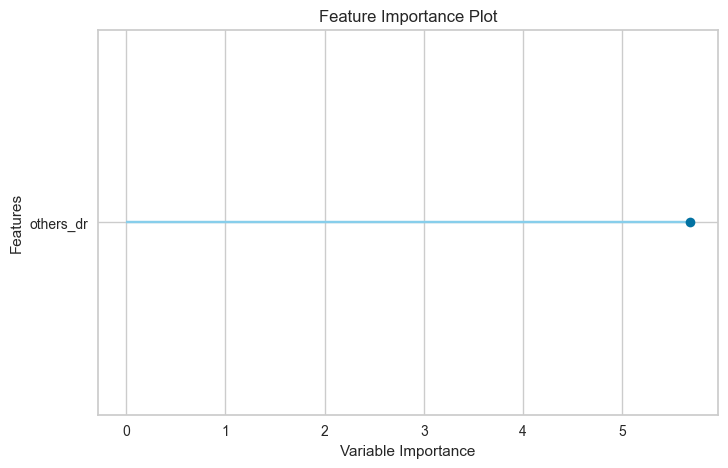

In [49]:
plot_model(best_model,plot='feature')

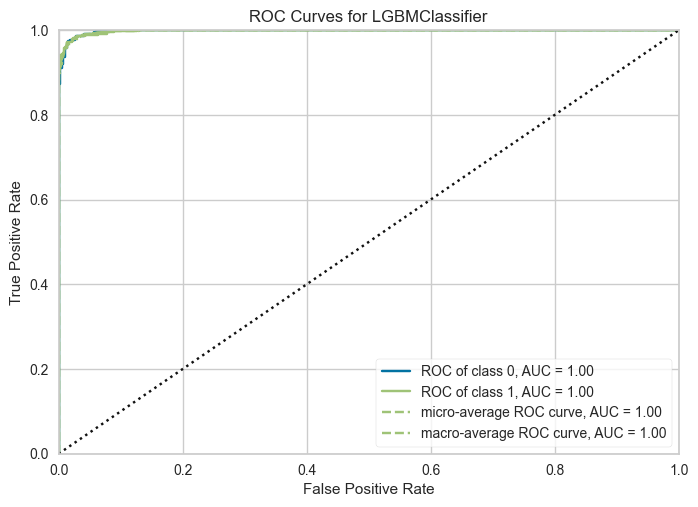

In [29]:
plot_model(best_model)

# Price Prediction

In [73]:
ETH_market

,Open*,High,Low,Close**,Volume,Market Cap,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-31,1199.3600,1205.0900,1194.2000,1196.7700,3018513333,146453523490,-1.593797e+09,3018513333,-0.528007,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.770000,0.000000,0.000000,0.000000
2022-12-30,1201.5700,1202.0300,1187.4600,1199.2300,4055668253,146754748633,9.030692e+08,7074181586,0.127657,9.976944e+09,...,0.016395,0.003279,0.013116,2.672922,0.534584,2.138337,1197.863269,0.205553,0.205342,0.205553
2022-12-29,1190.0100,1204.1400,1188.3600,1201.6000,4132233940,147043867255,3.705028e+09,11206415526,0.330617,9.950723e+09,...,0.044835,0.011590,0.033245,4.814488,1.390565,3.423923,1199.523942,0.197627,0.197432,0.403586
2022-12-28,1212.7400,1213.1300,1185.7000,1189.9900,4991669631,145623194889,2.747333e+08,6214745895,0.016961,2.501501e+08,...,-0.010748,0.007123,-0.017871,8.296949,2.771842,5.525107,1195.431945,-0.966212,-0.970910,-0.566525
2022-12-27,1226.9900,1230.4200,1205.9000,1212.7900,4091530737,148414001604,-1.517397e+09,10306276632,-0.074787,1.354111e+10,...,0.097691,0.025236,0.072455,8.759233,3.969320,4.789913,1202.886818,1.915982,1.897859,1.338603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-05,0.9531,0.9706,0.9465,0.9502,219833,72240974,2.460530e+12,-1372918065031,0.197787,-9.471747e+04,...,-33.826201,-33.998999,0.172799,-63.568733,-54.197643,-9.371090,0.977765,-0.073614,-0.073642,-99.920603
2016-01-04,0.9720,0.9764,0.9298,0.9545,346245,72543707,2.460530e+12,-1372917718786,0.195874,-8.097371e+04,...,-33.178039,-33.834807,0.656768,-65.356722,-56.429459,-8.927263,0.970271,0.452536,0.451515,-99.920244
2016-01-03,0.9384,0.9914,0.9343,0.9719,407632,73843292,2.460530e+12,-1372917311154,0.051470,-6.839278e+04,...,-32.295747,-33.526995,1.231248,-66.624797,-58.468526,-8.156271,0.970619,1.822944,1.806528,-99.918790


In [81]:
ETH_market['Future_Close'] = ETH_market['Close**'].shift(+1)  # Shift closing price to the previous day for comparison
ETH_market.dropna(inplace=True)

In [82]:
ETH_market

,Open*,High,Low,Close**,Volume,Market Cap,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,Future_Close
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-30,1201.5700,1202.0300,1187.4600,1199.2300,4055668253,146754748633,9.030692e+08,7074181586,0.127657,9.976944e+09,...,0.003279,0.013116,2.672922,0.534584,2.138337,1197.863269,0.205553,0.205342,0.205553,1196.7700
2022-12-29,1190.0100,1204.1400,1188.3600,1201.6000,4132233940,147043867255,3.705028e+09,11206415526,0.330617,9.950723e+09,...,0.011590,0.033245,4.814488,1.390565,3.423923,1199.523942,0.197627,0.197432,0.403586,1199.2300
2022-12-28,1212.7400,1213.1300,1185.7000,1189.9900,4991669631,145623194889,2.747333e+08,6214745895,0.016961,2.501501e+08,...,0.007123,-0.017871,8.296949,2.771842,5.525107,1195.431945,-0.966212,-0.970910,-0.566525,1201.6000
2022-12-27,1226.9900,1230.4200,1205.9000,1212.7900,4091530737,148414001604,-1.517397e+09,10306276632,-0.074787,1.354111e+10,...,0.025236,0.072455,8.759233,3.969320,4.789913,1202.886818,1.915982,1.897859,1.338603,1189.9900
2022-12-26,1218.9200,1226.9700,1214.3400,1226.9700,3282098400,150149593574,1.764701e+09,13588375032,0.074865,1.825526e+10,...,0.075281,0.200179,7.228223,4.621100,2.607122,1213.234042,1.169205,1.162423,2.523459,1212.7900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-05,0.9531,0.9706,0.9465,0.9502,219833,72240974,2.460530e+12,-1372918065031,0.197787,-9.471747e+04,...,-33.998999,0.172799,-63.568733,-54.197643,-9.371090,0.977765,-0.073614,-0.073642,-99.920603,0.9509
2016-01-04,0.9720,0.9764,0.9298,0.9545,346245,72543707,2.460530e+12,-1372917718786,0.195874,-8.097371e+04,...,-33.834807,0.656768,-65.356722,-56.429459,-8.927263,0.970271,0.452536,0.451515,-99.920244,0.9502
2016-01-03,0.9384,0.9914,0.9343,0.9719,407632,73843292,2.460530e+12,-1372917311154,0.051470,-6.839278e+04,...,-33.526995,1.231248,-66.624797,-58.468526,-8.156271,0.970619,1.822944,1.806528,-99.918790,0.9545


In [84]:
import numpy as np
from pycaret.regression import *

# Initialize setup
clf = setup(data=ETH_market, target='Future_Close', session_id=123)

,Description,Value
0,Session id,123
1,Target,Future_Close
2,Target type,Regression
3,Original data shape,"(2555, 93)"
4,Transformed data shape,"(2555, 93)"
5,Transformed train set shape,"(1788, 93)"
6,Transformed test set shape,"(767, 93)"
7,Numeric features,92
8,Preprocess,True
9,Imputation type,simple


In [85]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,14.8278,640.1678,25.1988,0.9995,0.3501,0.2722,0.4500
ridge,Ridge Regression,14.6264,643.9178,25.2720,0.9995,0.3539,0.2660,0.0160
br,Bayesian Ridge,14.5248,671.4775,25.8102,0.9995,0.3418,0.2561,0.0160
lightgbm,Light Gradient Boosting Machine,15.1253,1100.9052,32.8146,0.9991,0.0749,0.0371,0.2830
llar,Lasso Least Angle Regression,16.7718,1067.4242,32.1945,0.9991,0.2034,0.1176,0.0160
gbr,Gradient Boosting Regressor,18.5566,1243.6712,35.0018,0.9990,0.2033,0.1293,0.4850
lasso,Lasso Regression,21.0072,1446.0448,37.7411,0.9988,0.4116,0.3775,0.3090
en,Elastic Net,21.0345,1447.1862,37.7592,0.9988,0.4032,0.3720,0.0230
et,Extra Trees Regressor,18.7657,1660.1667,40.3763,0.9987,0.0375,0.0243,0.3010
rf,Random Forest Regressor,22.8198,2388.0696,48.4277,0.9981,0.0425,0.0285,0.7060


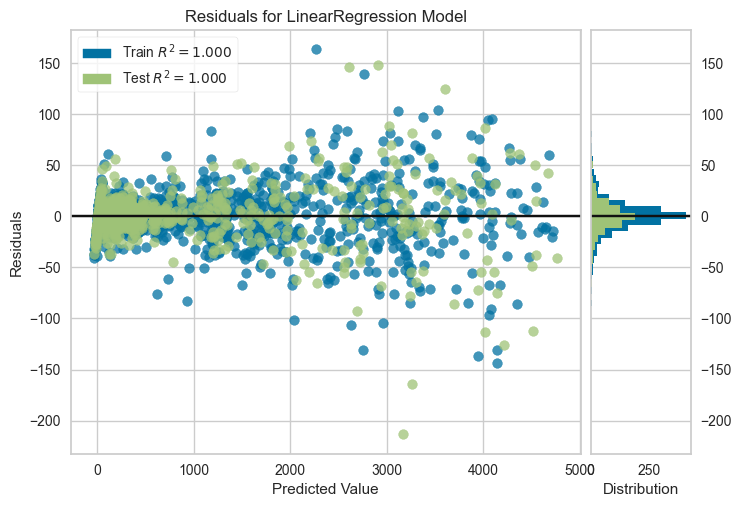

In [86]:
plot_model(best_model)

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('Ethereum_final_dataset.csv')

# Calculate lagged features for historical prices and volumes
for lag in [1, 3, 5, 7]:  # Example lags
    df[f'Close_lag_{lag}'] = df['Close'].shift(lag)
    df[f'Volume_lag_{lag}'] = df['Volume'].shift(lag)

# Define the target variable - next day's closing price
df['Next_Day_Close'] = df['Close'].shift(-1)

# Drop the first and last rows which will have NaN values due to the shifts
df.dropna(inplace=True)
